In [1]:
from truss_casadi import *
import numpy as np
import scipy as sp
from scipy.optimize import NonlinearConstraint, minimize, Bounds, shgo

joints = [
    Joint(JointType.PIN),  # 0
    Joint(JointType.ROLLER), # 1 
    Joint(JointType.GUSSET), # 2
] 


links = [Link(0, 1), Link(0,2), Link(1,2)]

FORCE_PER_M = 2.5
bridge_joints = [0, 1]
train_force = Force(fx=0, fy=FORCE_PER_M, joints=bridge_joints)

forces = [train_force]

truss = Truss(joints, links, forces)

cost = Function('cost', [truss.xs], [truss.cost])
jac = Function('jacobian', [truss.xs], [truss.jacobian])
hess = Function('hessian', [truss.xs], [truss.hessian])

# xs = [0, 7, 14, 3.5, 10.5]
# ys = [0, 0, 0, -20, -20]
xs = [0, 14, 7]
ys = [0, 0, -5]
# [  0.    3.5  14.    0.    0.    0.    0.    0.  -20.  -20. ]
inputs = xs + ys

print(cost(inputs))
print(jac(inputs))
print(hess(inputs))

483.07
[[-27.206, 27.206, -9.97164e-39, 8.71857, 8.71857, -17.4371]]

[[0.589093, -3.00319e-39, -0.589093, 0.82473, 3.09881e-39, -0.82473], 
 [-3.00319e-39, 0.589093, -0.589093, -2.41444e-39, -0.82473, 0.82473], 
 [-0.589093, -0.589093, 1.17819, -0.82473, 0.82473, -1.27341e-39], 
 [0.82473, -2.41444e-39, -0.82473, 2.22605, -1.07143, -1.15462], 
 [3.09881e-39, -0.82473, 0.82473, -1.07143, 2.22605, -1.15462], 
 [-0.82473, 0.82473, -1.27341e-39, -1.15462, -1.15462, 2.30924]]


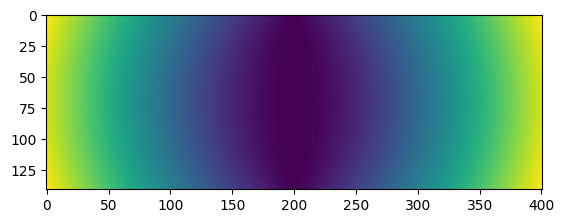

In [2]:
import numpy as np 
import matplotlib.pyplot as plt


img = []
for x in np.arange(0, 14.1, 0.1):
    row = []
    for y in np.arange(-20, 20.1, 0.1):
        row.append(float(cost([0, 14, x, 0, 0, y])))
    img.append(row)



imgplot = plt.imshow(img)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


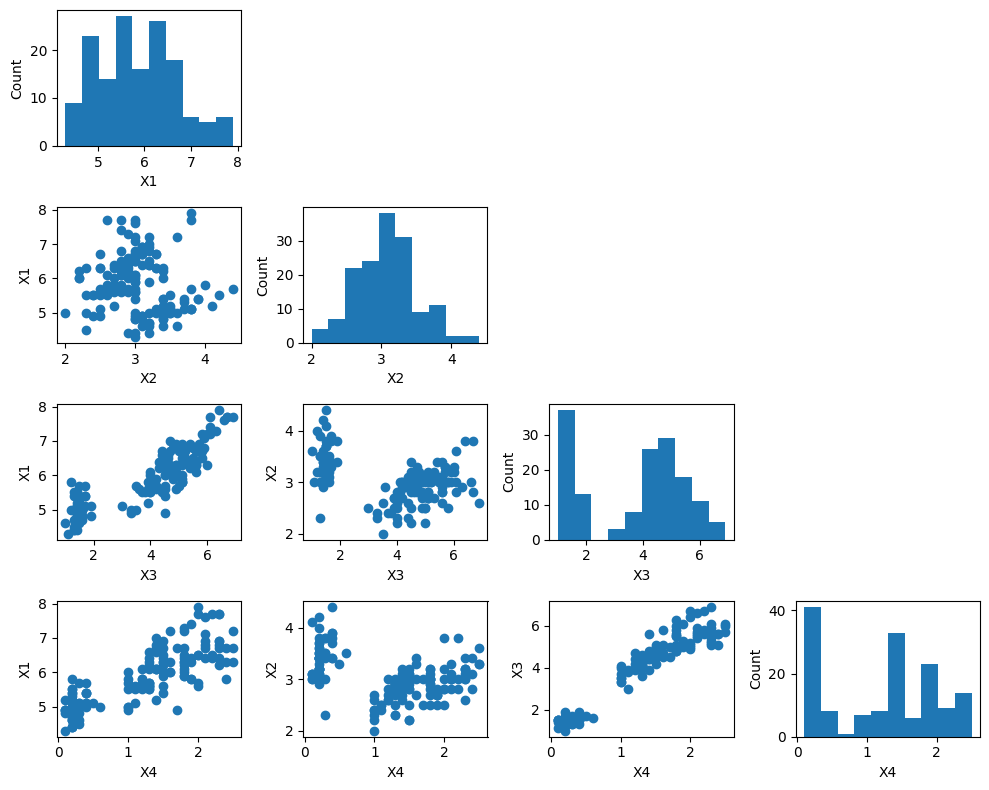